In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import data_description

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')

In [8]:
df= pd.read_csv(r"data\train.csv")
x_train= df.drop(columns=["SalePrice"],axis = 1 )
y_train= pd.DataFrame(df.loc[:,"SalePrice"])

In [16]:
cols_64_80 = pd.DataFrame(df.iloc[:,64:])

cols_64_80

,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [83]:
cols = list(cols_64_80.columns)
for col in cols:
    print(f" {col}  : {get_description(col)}")
    

    


 GarageCond  : Garage condition
 PavedDrive  : Paved driveway
 WoodDeckSF  : Wood deck area in square feet
 OpenPorchSF  : Open porch area in square feet
 EnclosedPorch  : Enclosed porch area in square feet
 3SsnPorch  : Three season porch area in square feet
 ScreenPorch  : Screen porch area in square feet
 PoolArea  : Pool area in square feet
 PoolQC  : Pool quality
 Fence  : Fence quality
 MiscFeature  : Miscellaneous feature not covered in other categories
 MiscVal  : $Value of miscellaneous feature
 MoSold  : Month Sold (MM)
 YrSold  : Year Sold (YYYY)
 SaleType  : Type of sale
 SaleCondition  : Condition of sale
 SalePrice  : SalePrice


In [27]:
#number of rows we have
n= df.shape[0]

In [79]:
cols_64_80.describe()


,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [104]:
#find distinct values in every column
def dist(data,n,m):
    n= df.shape[0]
    liste = []
    for i in range(n):
        
        liste.append(data.iloc[i,m])
    liste = np.unique(liste)       
    return liste


for i in range(16):
    
    print(f"{cols_64_80.columns[i]} : {dist(cols_64_80,n,i)}")  
    print("\n")          


GarageCond : ['Ex' 'Fa' 'Gd' 'Po' 'TA' 'nan']


PavedDrive : ['N' 'P' 'Y']


WoodDeckSF : [  0  12  24  26  28  30  32  33  35  36  38  40  42  44  45  48  49  52
  53  55  56  57  58  60  63  64  66  68  70  72  74  78  80  81  84  85
  86  87  88  89  90  92  95  96  97  98 100 103 104 105 106 108 110 112
 113 114 115 116 117 120 121 122 123 124 125 126 127 128 132 133 135 136
 138 139 140 141 142 143 144 145 146 147 148 149 150 153 154 155 156 158
 159 160 161 162 164 165 166 168 169 170 171 172 173 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 190 192 194 195 196 197 198 199 200
 201 202 203 206 207 208 209 210 212 214 215 216 218 219 220 222 224 227
 228 229 232 233 234 235 236 237 238 239 240 241 242 243 245 248 250 252
 253 255 256 257 260 261 262 263 264 265 268 269 270 272 276 278 280 283
 288 289 290 292 294 295 296 298 300 301 302 303 304 305 306 307 309 312
 314 315 316 320 321 322 324 325 326 327 328 333 335 340 342 344 349 351
 352 353 355 356 361 362 364 365 3

In [80]:
#we find which columns have null values
cols_64_80.isnull().sum()

GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

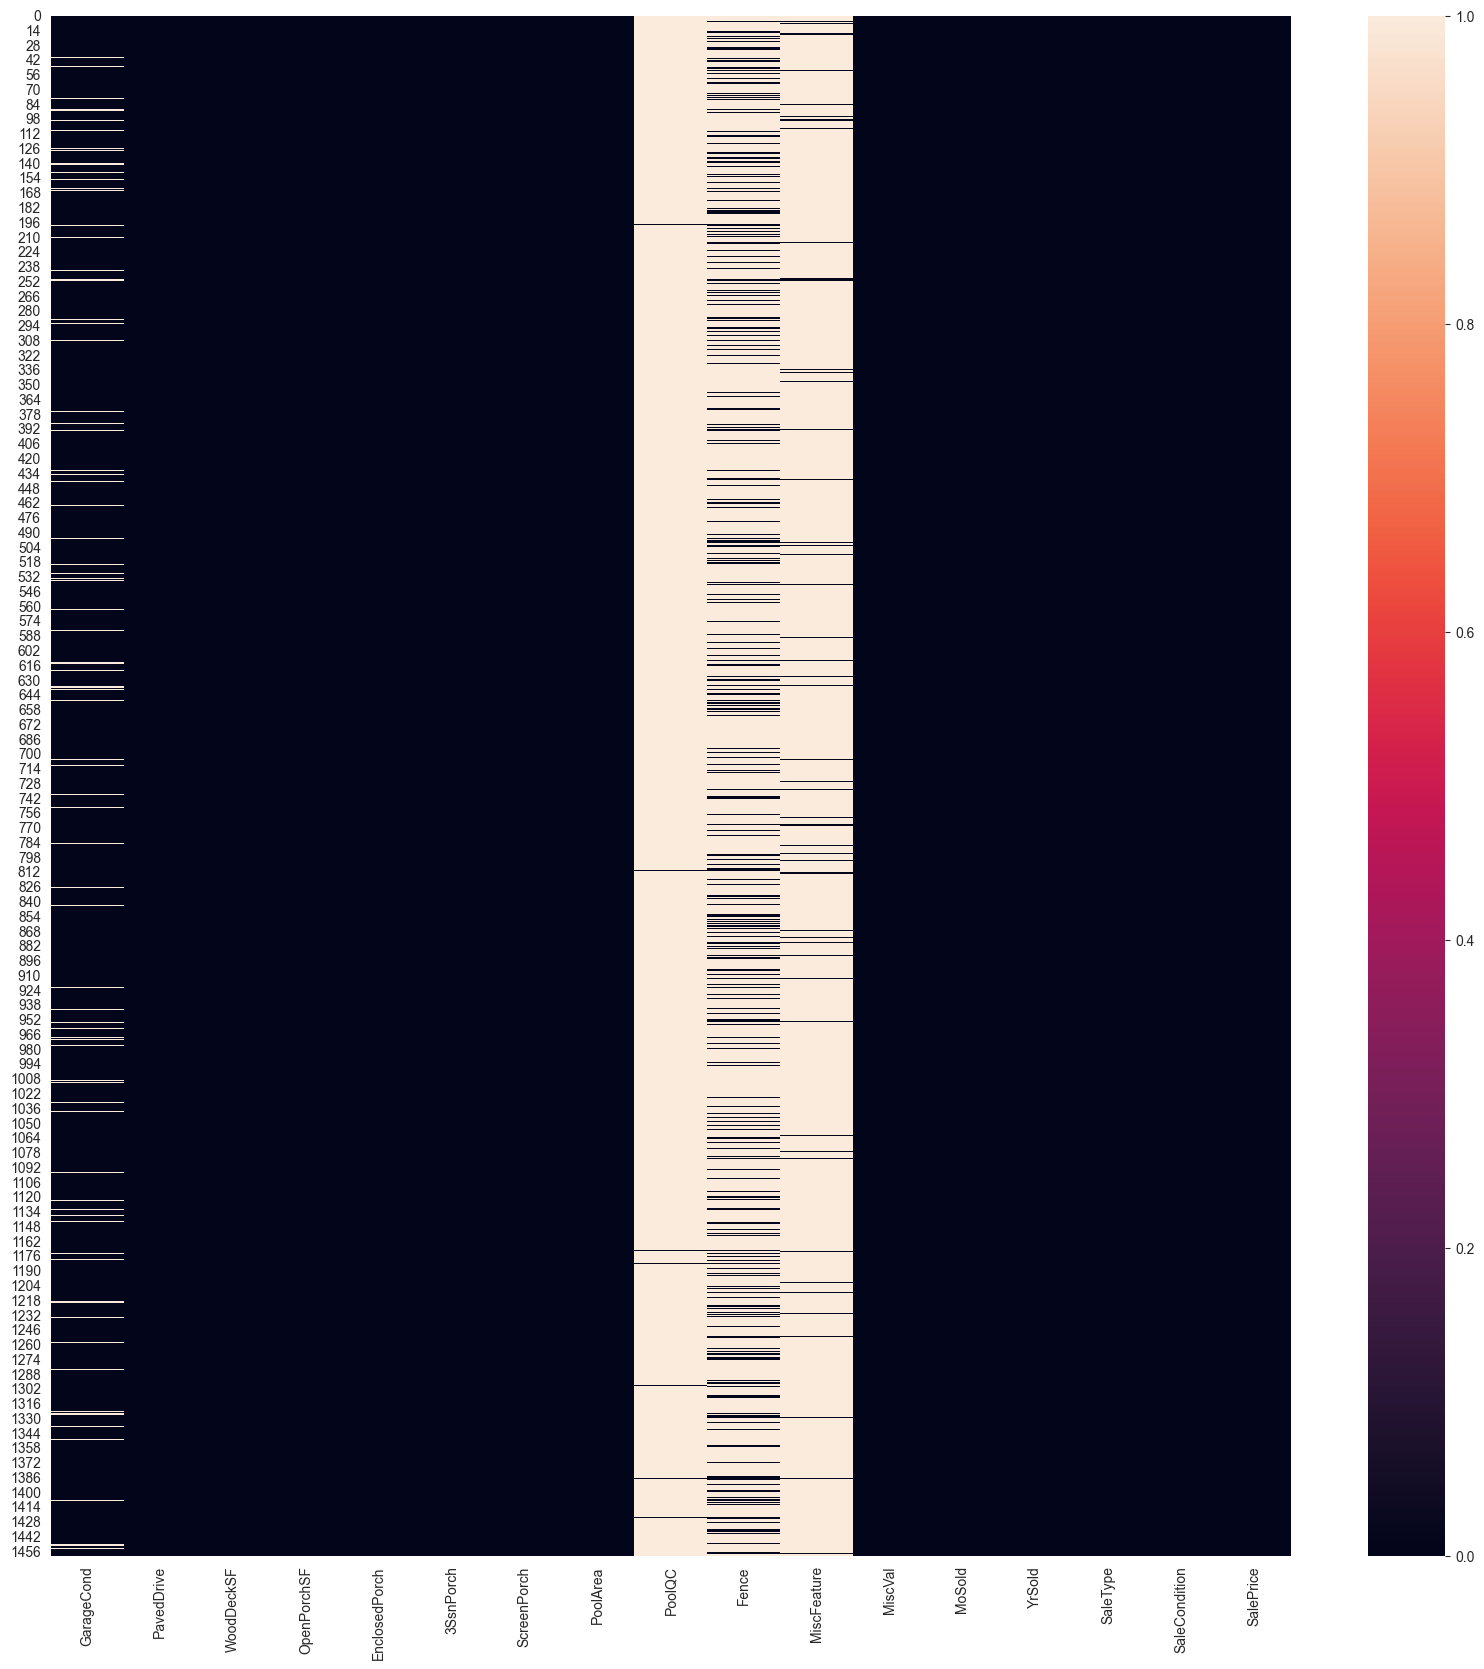

In [86]:
# show where you have null values in  heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(cols_64_80.isnull())
plt.show()

Here we deduce that while GarageConde is having 88 entries PoolQC, Fence and MiscFeature are having over 1100 none values which is wierd. That means that while entering data the operator means by none No_Pool,No_Fence,No_MiscFeature as  mentioned in the data description file.

In [89]:
#replace all none values in GarageConde,poolQC,Fence and MiscFeature with No_Garage,No_Pool,No_Fence,No_MiscFeature.

missingfree_df = cols_64_80.copy()
missingfree_df["GarageCond"]=missingfree_df["GarageCond"].fillna("No_Garage")
missingfree_df["PoolQC"]=missingfree_df["PoolQC"].fillna("No_Pool")
missingfree_df["Fence"]=missingfree_df["Fence"].fillna("No_Fence")
missingfree_df["MiscFeature"]=missingfree_df["MiscFeature"].fillna("No_MiscFeature")

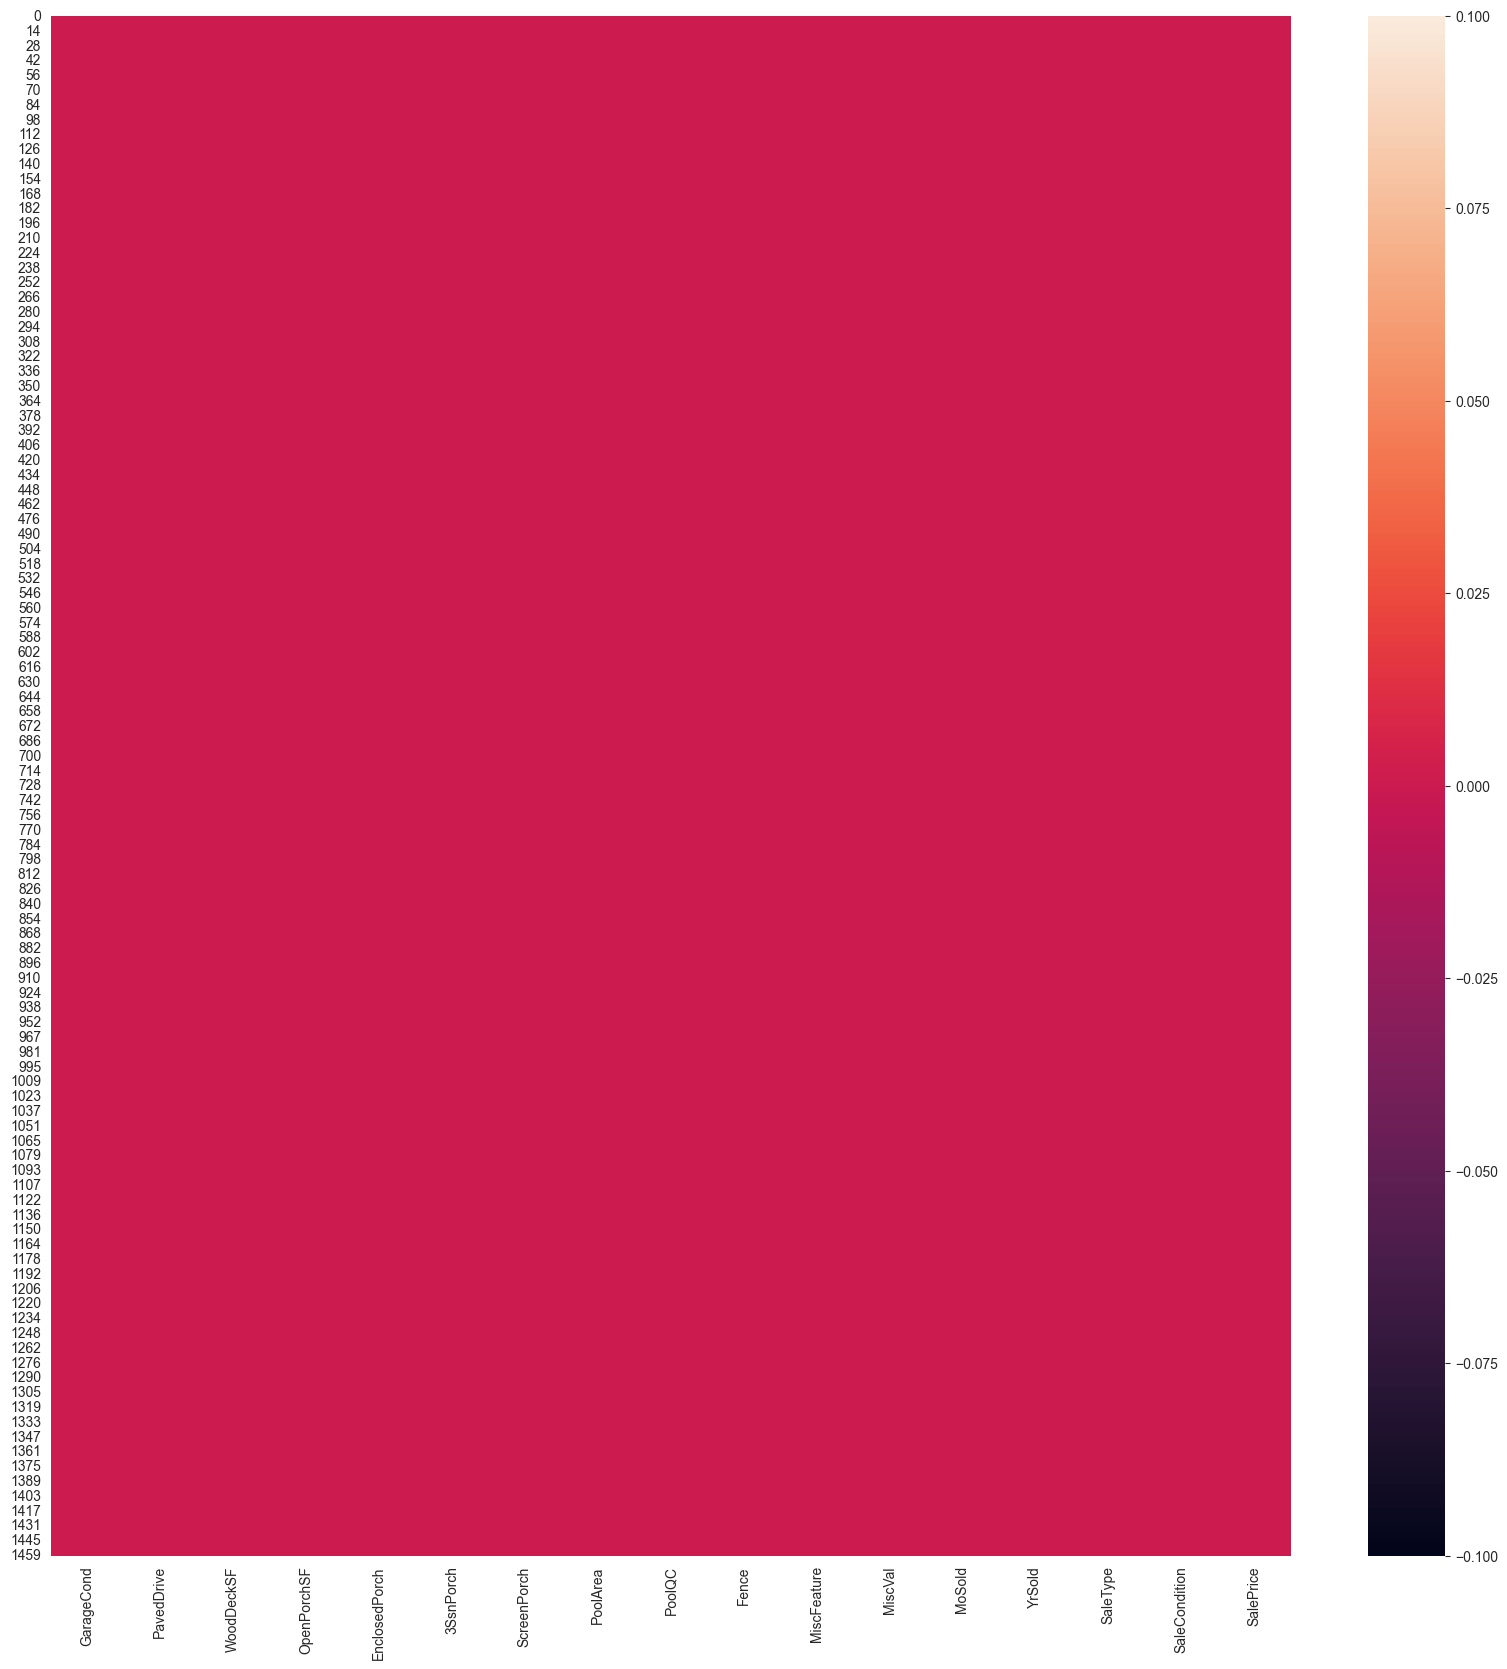

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(missingfree_df.isnull())
plt.show()

Now our data is not having none values. Let us find out if we have multicolinearity.

In [102]:
# Drop duplicates
missingfree_df.drop_duplicates(inplace= True)

In [106]:
#convert categorical ordinal and  data columns to numerical values and ignore nominal categorical data because they can not be interpreted by machine learning models

missingfree_df_ml = missingfree_df.copy()
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("No_Garage","0")
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("Po","1")
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("Fa","2")
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("TA","3")
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("Gd","4")
missingfree_df_ml["GarageCond"]=missingfree_df_ml["GarageCond"].str.replace("Ex","5")
missingfree_df_ml["PavedDrive"]=missingfree_df_ml["PavedDrive"].str.replace("N","0")
missingfree_df_ml["PavedDrive"]=missingfree_df_ml["PavedDrive"].str.replace("P","1")
missingfree_df_ml["PavedDrive"]=missingfree_df_ml["PavedDrive"].str.replace("Y","2")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("No_Pool","0")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("Po","1")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("Fa","2")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("TA","3")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("Gd","4")
missingfree_df_ml["PoolQC"]=missingfree_df_ml["PoolQC"].str.replace("Ex","5")
# missingfree_df["PoolQC"]=missingfree_df["PoolQC"].fillna("No_Pool")
# missingfree_df["Fence"]=missingfree_df["Fence"].fillna("No_Fence")
# missingfree_df["MiscFeature"]=missingfree_df["MiscFeature"].fillna("No_MiscFeature")

In [105]:
for i in range(16):
    
    print(f"{missingfree_df_ml.columns[i]} : {dist(missingfree_df_ml.columns,n,i)}")  
    print("\n")          

AttributeError: 'Index' object has no attribute 'iloc'